In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np

## Set Parameters

In [2]:
#circle params
r = 2  # radius
x0 = 3  # x value of the circles center
y0 = 3  # y value of the circles center

In [3]:
#boundary points
b1 = np.array([4, 0, 0])  # first point to specify the boundary
b2 = np.array([2, 4, 0])  # sencond point to specify the boundary 

m = (b2[1]-b1[1])/(b2[0]-b1[0])  # slope of the linear function which describes the boundary
t = b1[1]- m * b1[0]  # y intercept of the linear function which describes the boundary 

if m == np.inf:  # criterion to determine wether boundary can be written as linear equation or boundary is a vertical line
    x = b1[0]    # if the boundary is a vertical line, the x-value of the boundary particle intersection points are known
else:
    x = None
    
print(x,m,t)

None -2.0 8.0


## Plot Circle and Line

In [4]:
xPoints = np.linspace(0,6,1000)
ThetaPoints = np.linspace(0,2 * np.pi,1000)

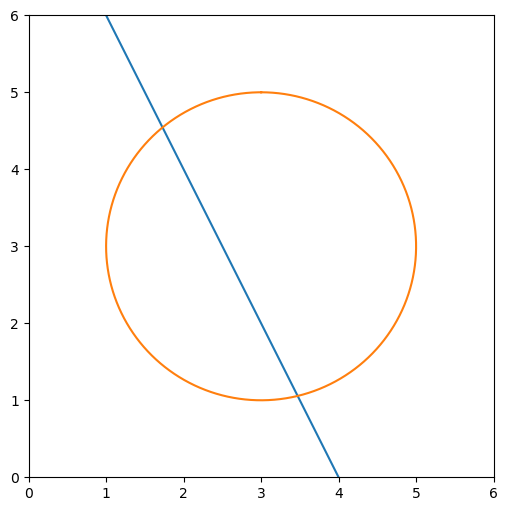

In [5]:
fig,ax = plt.subplots(figsize = (6,6))

ax.set_xlim(0,6)
ax.set_ylim(0,6)
if x:
    ax.axvline(x = b1[0],color = 'C1')
else:
    ax.plot(xPoints, m * xPoints + t)
ax.plot(r * np.sin(ThetaPoints) + x0, r * np.cos(ThetaPoints) + y0)


# Analytical Approach SciPy

In [6]:
def circle_takes_y(x):
    circle = (m*x+t-y0)**2 + (x-x0)**2 - r**2
    return circle

In [7]:
def circle_takes_x(y):
    circle = (y-y0)**2 + (x-x0)**2 - r**2
    return circle

In [8]:
def linear_equation(x):
    return m * x + t

In [9]:
if x:
    one = fsolve(circle_takes_x, y0 - r)
    two = fsolve(circle_takes_x, y0 + r)
    scipy_intersec_1 = np.array([x,one[0], 0])
    scipy_intersec_2 = np.array([x,two[0], 0])
else:
    one = fsolve(circle_takes_y, x0 - r)
    two = fsolve(circle_takes_y, x0 + r)
    scipy_intersec_1 = np.array([one[0], linear_equation(one[0]), 0])
    scipy_intersec_2 = np.array([two[0], linear_equation(two[0]), 0])
    
scipy_intersec_1, scipy_intersec_2

(array([1.72822021, 4.54355958, 0.        ]),
 array([3.47177979, 1.05644042, 0.        ]))

# Geometrical Approach Numpy

In [10]:
M = np.array([x0, y0, 0]) - b1
u = b2 - b1
Mu = np.dot(M, u)/np.linalg.norm(u)**2 * u
Lot = Mu - M
l = np.sqrt(r**2 - np.linalg.norm(Lot)**2)

numpy_intersec_1 = Mu + Mu/np.linalg.norm(Mu) * l + b1
numpy_intersec_2 = Mu - Mu/np.linalg.norm(Mu) * l + b1

numpy_intersec_1, numpy_intersec_2

(array([1.72822021, 4.54355958, 0.        ]),
 array([3.47177979, 1.05644042, 0.        ]))

# Analytical Approach SymPy 

In [11]:
import sympy as smp

In [12]:
y_= smp.symbols('y')
x_= smp.symbols('x')

In [13]:
if x:
    circle_x_known = (y_-y0)**2 + (x-x0)**2 - r**2
    solutions = np.float64(smp.solve(circle_x_known, y_))
    if len(solutions) == 2:
        i = 1
    else:
        i = 0
    sympy_intersec_1 = np.array([x, solutions[0],0])
    sympy_intersec_2 = np.array([x, solutions[i],0])
else:
    circle_y_known = (m*x_+t-y0)**2 + (x_-x0)**2 - r**2
    solutions = np.float64(smp.solve(circle_y_known, x_))
    if len(solutions) == 2:
        i = 1
    else:
        i = 0
    sympy_intersec_1 = np.array([solutions[0], linear_equation(solutions[0]),0])
    sympy_intersec_2 = np.array([solutions[i], linear_equation(solutions[i]),0])
    
sympy_intersec_1, sympy_intersec_2

(array([1.72822021, 4.54355958, 0.        ]),
 array([3.47177979, 1.05644042, 0.        ]))

# Analytical Approach hardcoded

In [14]:
if x:
    A = 1
    B = -2*y0
    C = y0**2 - r**2 + (x-x0)**2
    
    hard_y1 = (-B + np.sqrt(B**2-4*A*C))/(2*A)
    hard_y2 = (-B - np.sqrt(B**2-4*A*C))/(2*A)
    
    hard_intersec_2 = np.array([x, hard_y1, 0])
    hard_intersec_1 = np.array([x, hard_y2, 0])
else:
    A = m**2 +1
    B = 2 * (m*t - m*y0 - x0)
    C = y0**2 - r**2 + x0**2 - 2*t*y0 + t**2
    
    hard_x1 = (-B + np.sqrt(B**2-4*A*C))/(2*A)
    hard_x2 = (-B - np.sqrt(B**2-4*A*C))/(2*A)
    
    hard_intersec_2 = np.array([hard_x1, linear_equation(hard_x1), 0])
    hard_intersec_1 = np.array([hard_x2, linear_equation(hard_x2), 0])
    
    hard_intersec_1, hard_intersec_2

# Benchmark

In [15]:
import timeit

In [16]:
%%timeit
# Analytical Approach Sympy Solver
if x:
    circle_x_known = (y_-y0)**2 + (x-x0)**2 - r**2
    solutions = np.float64(smp.solve(circle_x_known, y_))
    if len(solutions) == 2:
        i = 1
    else:
        i = 0
    sympy_intersec_1 = np.array([x, solutions[0],0])
    sympy_intersec_2 = np.array([x, solutions[i],0])
else:
    circle_y_known = (m*x_+t-y0)**2 + (x_-x0)**2 - r**2
    solutions = np.float64(smp.solve(circle_y_known, x_))
    if len(solutions) == 2:
        i = 1
    else:
        i = 0
    sympy_intersec_1 = np.array([solutions[0], linear_equation(solutions[0]),0])
    sympy_intersec_2 = np.array([solutions[i], linear_equation(solutions[i]),0])

31 ms ± 961 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
print(sympy_intersec_1, sympy_intersec_2)

[1.72822021 4.54355958 0.        ] [3.47177979 1.05644042 0.        ]


In [18]:
%%timeit
# Geometrical Approach Numpy
M = np.array([x0, y0, 0]) - b1
u = b2 - b1
Mu = np.dot(M, u)/np.linalg.norm(u)**2 * u
Lot = Mu - M
l = np.sqrt(r**2 - np.linalg.norm(Lot)**2)

numpy_intersec_1 = Mu + Mu/np.linalg.norm(Mu) * l + b1
numpy_intersec_2 = Mu - Mu/np.linalg.norm(Mu) * l + b1

61.3 µs ± 5.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
print(numpy_intersec_1, numpy_intersec_2)

[1.72822021 4.54355958 0.        ] [3.47177979 1.05644042 0.        ]


In [20]:
%%timeit
# Analytical Approach SciPy Solver 
if x:
    one = fsolve(circle_takes_x, y0 - r)
    two = fsolve(circle_takes_x, y0 + r)
    scipy_intersec_1 = np.array([x,one[0], 0])
    scipy_intersec_2 = np.array([x,two[0], 0])
else:
    one = fsolve(circle_takes_y, x0 - r)
    two = fsolve(circle_takes_y, x0 + r)
    scipy_intersec_1 = np.array([one[0], linear_equation(one[0]), 0])
    scipy_intersec_2 = np.array([two[0], linear_equation(two[0]), 0])

348 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [21]:
print(scipy_intersec_1, scipy_intersec_2)

[1.72822021 4.54355958 0.        ] [3.47177979 1.05644042 0.        ]


In [22]:
%%timeit
# Analytical Approach Hardcoded
if x:
    A = 1
    B = -2*y0
    C = y0**2 - r**2 + (x-x0)**2
    
    hard_y1 = (-B + np.sqrt(B**2-4*A*C))/(2*A)
    hard_y2 = (-B - np.sqrt(B**2-4*A*C))/(2*A)
    
    hard_intersec_2 = np.array([x, hard_y1, 0])
    hard_intersec_1 = np.array([x, hard_y2, 0])
else:
    A = m**2 +1
    B = 2 * (m*t - m*y0 - x0)
    C = y0**2 - r**2 + x0**2 - 2*t*y0 + t**2
    
    hard_x1 = (-B + np.sqrt(B**2-4*A*C))/(2*A)
    hard_x2 = (-B - np.sqrt(B**2-4*A*C))/(2*A)
    
    hard_intersec_2 = np.array([hard_x1, linear_equation(hard_x1), 0])
    hard_intersec_1 = np.array([hard_x2, linear_equation(hard_x2), 0])

13.3 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [23]:
print(hard_intersec_1, hard_intersec_2)

[1.72822021 4.54355958 0.        ] [3.47177979 1.05644042 0.        ]


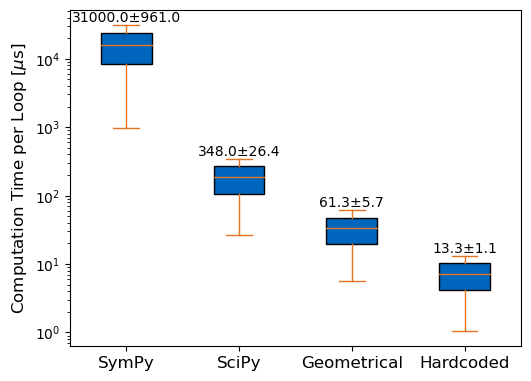

In [24]:
import matplotlib.pyplot as plt

sympy = [31000, 961]
scipy = [348, 26.4]
geometrical = [61.3, 5.7]
hardcoded = [13.3, 1.05]

data = [sympy, scipy, geometrical, hardcoded]
labels=['SymPy', 'SciPy', 'Geometrical', 'Hardcoded']

width_mm = 148
height_mm = width_mm * 0.75
height_inches = height_mm / 25.4

fig, ax = plt.subplots(figsize=(width_mm/25.4, height_inches))

box = ax.boxplot(data, patch_artist=True, labels=labels)

ax.set_yscale('log')


blue_color = (0/255, 101/255, 189/255, 1)
orange_color = (227/255, 114/255, 34/255, 1)
for patch in box['boxes']:
    patch.set_facecolor(blue_color)
for median in box['medians']:
    median.set_color(orange_color)
for whisker in box['whiskers']:
    whisker.set_color(orange_color)
for cap in box['caps']:
    cap.set_color(orange_color)

for i, label in enumerate(labels):
    x = i + 1
    y = data[i][0]
    std = data[i][1]
    plt.text(x, y, f"{y:.1f}±{std:.1f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Computation Time per Loop [$\mu$s]', fontsize=12)
ax.set_xticklabels(labels, fontsize=12)
#plt.title('Runtime Analysis')

plt.savefig('T:/BA_DEM_Thesis/Template_Thesis/images/boxplot_runtime.pdf')
